## Supervised Learning Part II - PyTorch

The library we've been using on our examples so far, **scikit-learn**, offers many options of "canned" Machine Learning models via an interface where different algorithms can be manipulated as simple objects. It is a great way to get started with Machine Learning and even solve real-life problems using simple to moderately complex models, with moderately large amounts of data.

However, to tackle more data-intensive tasks you need more powerful tools and **scikit-learn's** canned models won't be enough.

This is where **PyTorch** comes in. It has many performance advantages over **scikit-learn**, including but not limited to:

1. It supports GPU acceleration whereas sklearn only supports CPU.

2. It explicitly requires you to define and control the class of functions (we'll call it Models for now on) you'll use to approximate the Target, the loss functions and the optimization solvers as separate objects (some may argue this is an inconvenience). This allows more flexibility to pick the right combination of tools for each type of problem.

3. Its interface for defining Models is more flexible and expressive than sklearn's. This enables you to easily create very complex models. 

4. It has user-friendly frameworks for parallel and distributed model training.

5. It offers out-of-the-box class templates that make it easy to deal with massive datasets.

**PyTorch** can be seen as a general purpose Machine Learning, or even Scientific Computing framework. However, here we focus on the most common usage of the library: building Neural Networks.

# Neural Networks Primer:

If you look beyond the cool name, you will see that Neural Networks are just another "family" of mathematical function $f(X;\theta)$. But this family of functions is so useful that it sometimes seems almost magical. To add to their allure, Neural Networks can be difficult to write down mathematically depending on how complex their "architeture" is. It is easier to visualize how they work by drawing them as a graph:

![](./images/nnet.png)

Where each neuron represents a linear combination of its inputs with a non-linear function applied to it:

![](./images/neuron.png)

The **weights** $W$ of each neuron in each layer are the parameters $\theta$ of this class of function.

Common choices of non-linear **activation** functions for neurons are the *Sigmoid (or Logistic)* function:

$f(x) = \frac{1}{1+\exp{-x}}$

And the Rectified Linear Unit (a.k.a. ReLU):

$f(x) = \max{(0,x)}$

The type of neural network represented above is known as a **Feed Forward Neural Network** and it is the most "basic" member of this family of functions. More complex Neural Networks include ones where neurons in one layer do not necessarily connect to all neurons in the next layer; where other mathematical operations, like *convolutions* take place inside a neuron; and where ouputs in one layer can become inputs of preceding layers.

As we've seen, Machine Learning algorithms generally involve solving the optimization problem

$\hat{F(X)} = \underset{\theta}{\operatorname{argmin}} L(Y,f(X;\theta))$

This generally requires finding critical points of a function, that is, points where the derivative of the function with respect to its parameters $\theta$ is zero.

Whether you attempt to do it analytically or numerically... How do you compute the derivatives of $L$ with respect to $\theta$ when there's a crazy Neural Network nested in it?

# Backpropagation

For reasons we will not delve into in this workshop, an efficient way of solving the optimization problem above is by combining two numerical algorithms: **Backpropagation** and variants of **Gradient Descent**.

Here is a summary of the method with vanilla Gradient Descent:

1. Randomly initialize all Weights $W$ of the neural network.

2. Forward Propagation: Run your inputs X through the neural neutwork and get an output $\hat{Y}$.

3. Take the output of the Neural Network and compute the Loss $L(\hat{Y}, Y)$.

4. Backpropagation: Run the computed loss value backwards through all layers of the network, but this time each layer will represent the derivatives of the loss function with respect to the **Weights** in that layer. At the end of this process, you will obtain an estimate of $\nabla_W L$, the gradient of $L$ with respect to all **Weights** of the neural network.
    
5. Gradient Descent - Update the **Weights** $W$ using the gradient computed in step 4: $W = W - \alpha\nabla_W L$, where $\alpha$ is a (usually small) constant called the **learning rate**. 

6. Repeat steps 1 through 5 until a stopage criterion is reached. Common criteria include:

    a. The Loss reaches zero, or a value smaller than a pre-defined threshold.
    
    b. Steps 1 through 5 have been repeated a (usually large) pre-defined number of times.
    
Variations of this method include, but are not limited to:

* Running all examples X at once through the network, resulting in large matrix multiplications being performed; 

* Running smaller, *randomly selected batches* of examples X through the network instead; 

* Using an adaptive learning rate;

* Using other types of weight update (also called "a step").

* Randomly selecting neurons to be *dropped out* from the computations at each iteration;

# Loss Function

You know the Loss function is a measure of the error we incurr in when using a function $f(x;\theta)$ to approximate a target $F^*$, but we haven't seen what it looks like. The choice of an appropriate Loss function will depend first on the type of task at hand, then on statistical properties of the data and, to a smaller degree, on the choice of algorithm. Below are some common choices of Loss function.

### Task: Regression

**Mean Squared Error (MSE) Loss:**

$L(Y,\hat{Y}) = \frac{1}{N}\sum{(Y-\hat{Y})^2}$

**Mean Absolute Error (MAE) Loss:**

$L(Y,\hat{Y}) =\frac{1}{N}\sum{|Y-\hat{Y}|}$

### Task: Classification

**Cross Entropy Loss:**

$L(Y,\hat{Y}) = -\sum{Y_{class} * log(\hat{Y_{class}})}$

This Loss is commonly used in Classification problems where there are more than two classes of outputs.

**The Binary Cross Entropy Loss:**

$L(Y,\hat{Y}) = -(Y*log(\hat{Y}) + (1-Y)*log(1-\hat{Y}))$

You may recognize this as the general Cross Entropy above with only two output classes, or the negative log-likelihood of a Bernoulli Distribution.

____

## Neural Networks With PyTorch Example 1 - Iris Dataset Revisited
    
To see all this in action, let's go back to the Iris Dataset and train a logistic regression model with **PyTorch**, this time representing it as a neural network:

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import numpy as np
import torch
from torch.autograd import Variable



# LET'S CREATE OUR TRAINING AND TEST SETS

header = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

iris_dataset = read_csv('./data/iris.csv',names = header) 

# ENCODE SPECIES AS CATEGORY NUMBERS 
iris_dataset.loc[iris_dataset.species=='Iris-setosa', 'species'] = 0
iris_dataset.loc[iris_dataset.species=='Iris-versicolor', 'species'] = 1
iris_dataset.loc[iris_dataset.species=='Iris-virginica', 'species'] = 2

X = iris_dataset.values[:,0:4].astype('float32')
Y = iris_dataset.values[:,4].astype('int32')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

# CONVERT DATASETS TO PYTORCH TENSORS
X_train = Variable(torch.Tensor(X_train).float())
X_test = Variable(torch.Tensor(X_test).float())
Y_train= Variable(torch.Tensor(Y_train).long())
Y_test = Variable(torch.Tensor(Y_test).long())

In [2]:
# DEFINE OUR LOGISTIC REGRESSION MODEL AS A NEURAL NETWORK, INITIALIZE AN OPTIMIZER AND PICK A LOSS FUNCTION


# THERE IS A WAY TO CALL MODELS AS FUNCTIONS LIKE WE DID WITH SKLEARN, BUT CLASSES ARE PREFERABLE
class LogisticRegression(torch.nn.Module):

    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.fc1 = torch.nn.Linear(4, 3)
    def forward(self, X):
        X = self.fc1(X)

        return X  

model = LogisticRegression()

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
loss_function = torch.nn.CrossEntropyLoss()  

print(model)


LogisticRegression(
  (fc1): Linear(in_features=4, out_features=3, bias=True)
)


In [3]:
# NOW WE TRAIN THE MODEL

epochs = 1000

for i in range(epochs):
    
    optimizer.zero_grad()
    
    # FORWARD-PROPAGATION     
    Y_hat = model(X_train)

    loss = loss_function(Y_hat, Y_train)
    #print("Loss at step", i, "is:" , loss.data.item())
    
    # BACKPROPAGATION
    loss.backward()

    # UPDATE WEIGHTS
    optimizer.step()
    
# NOTICE HOW THE ERROR DECREASES WITH EACH STEP

print('Finished Training!')

Finished Training!


In [4]:
# HOW DID IT DO ON THE TEST SET?

Y_hat_test = model(X_test)
Y_predicted = torch.max(Y_hat_test, 1).indices

print("\n This model got", accuracy_score(Y_test, Y_predicted)*100, "% right")



 This model got 70.0 % right


In [5]:
# NOW WHAT HAPPENS IF WE USE A MORE COMPLEX NEURAL NET INSTEAD OF LOGISTIC REGRESSION?

class NeuralNet(torch.nn.Module):

    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = torch.nn.Linear(4, 100)
        self.fc2 = torch.nn.Linear(100, 100) # NOTICE THE SIZE OF THE OUTPUT MATCHES THE SIZE OF THE INPUT OF THE NEXT LAYER
        self.fc3 = torch.nn.Linear(100, 3)
        
    def forward(self, X):
        X = torch.nn.functional.sigmoid(self.fc1(X)) # NOTICE THE SIGMOID ACTIVATION APPLIED TO EACH LAYER
        X = torch.nn.functional.sigmoid(self.fc2(X))
        X = self.fc3(X)
        
        return X

nnet_model = NeuralNet()

nnet_optimizer = torch.optim.SGD(nnet_model.parameters(), lr=learning_rate, momentum = 0.9) # ADDING A MOMENTUM TERM TO THE WEIGHT UPDATES  
nnet_loss_function = torch.nn.CrossEntropyLoss()  

print(nnet_model)


NeuralNet(
  (fc1): Linear(in_features=4, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=3, bias=True)
)


In [6]:
for i in range(epochs):
    
    nnet_optimizer.zero_grad()
    
    # FORWARD-PROPAGATION     
    Y_hat = nnet_model(X_train)

    loss = nnet_loss_function(Y_hat, Y_train)
    
    # BACKPROPAGATION
    loss.backward()
    print("Loss at step", i, "is:" , loss.data.item())
    # UPDATE WEIGHTS
    nnet_optimizer.step()
    
print('Finished Training!')
    
Y_hat_test = nnet_model(X_test)
Y_predicted = torch.max(Y_hat_test, 1).indices

print("\n This model got", accuracy_score(Y_test, Y_predicted)*100, "% right")

/usr/local/lib/python3.7/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Loss at step 0 is: 1.1090209484100342
Loss at step 1 is: 1.10553777217865
Loss at step 2 is: 1.1000306606292725
Loss at step 3 is: 1.0943821668624878
Loss at step 4 is: 1.0902012586593628
Loss at step 5 is: 1.08830988407135
Loss at step 6 is: 1.0885721445083618
Loss at step 7 is: 1.0901042222976685
Loss at step 8 is: 1.0917283296585083
Loss at step 9 is: 1.0924698114395142
Loss at step 10 is: 1.0918768644332886
Loss at step 11 is: 1.090077519416809
Loss at step 12 is: 1.0876057147979736
Loss at step 13 is: 1.085112452507019
Loss at step 14 is: 1.083101749420166
Loss at step 15 is: 1.0817910432815552
Loss at step 16 is: 1.0811043977737427
Loss at step 17 is: 1.0807735919952393
Loss at step 18 is: 1.080474615097046
Loss at step 19 is: 1.0799486637115479
Loss at step 20 is: 1.0790702104568481
Loss at step 21 is: 1.077858567237854
Loss at step 22 is: 1.0764434337615967
Loss at step 23 is: 1.0749964714050293
Loss at step 24 is: 1.0736602544784546
Loss at step 25 is: 1.0725065469741821
Loss 

## Exercise 3 - Wine Classification with PyTorch

Now you try. Let's go back to the Wine dataset and train a model with PyTorch.

In [ ]:
headers = ['wine_type','alcohol', 'malic_acid','ash','alcalinity_of_ash','magnesium',
           'total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','OD280_OD315','proline']

wine_dataset = read_csv(####)

# ENCODE SPECIES AS CATEGORY NUMBERS 
wine_dataset.loc[wine_dataset.wine_type=='wine_1', 'wine_type'] = ###
wine_dataset.loc[wine_dataset.wine_type=='wine_2', 'wine_type'] = ###
wine_dataset.loc[wine_dataset.wine_type=='wine_3', 'wine_type'] = ###

X = wine_dataset.values[###].astype('float32')
Y = wine_dataset.values[###].astype('int32')

X_train, X_test, Y_train, Y_test = ####

# CONVERT DATASETS TO PYTORCH TENSORS
X_train = Variable(torch.Tensor(X_train).float())
X_test = Variable(torch.Tensor(X_test).float())
Y_train= Variable(torch.Tensor(Y_train).long())
Y_test = Variable(torch.Tensor(Y_test).long())

___

# High Performance Machine Learning

So far we have trained models using **scikit-learn** and **PyTorch** on small datasets, where any modern Laptop can carry out the work in a matter of seconds. But what do you do when your problem involves massive amounts of data and training complex models many times over until you get results you are happy with?

If you recall when we introduced **PyTorch** on the previous notebook, we listed GPU acceleration, tools to handle massive datasets and user-friendly parallel/distributed training as advantages over **scikit-learn**.

We will now explore these advantages.

## GPU Acceleration

When people first learn about how computers work, the CPU is often referred to as the "brain of the computer". And in many ways it is. The CPU has to carry out many different types of instructions to enable everything from responding to keyboard/mouse events to playing YouTube videos while you type into a word processor at the same time. In other words, CPUs are built to be good at doing different types of things at the same time.

The Graphical Processing Unit (a.k.a the GPU) on the other hand, only has to be good at one thing: rendering graphics. 

As it turns out, being good at rendering graphics really means being good at performing Vector/Matrix/Tensor operations - the same type of operations that happen under the hood in Neural Networks. It follows that GPUs are better than CPUs at training Neural Networks.

Modern Machine Learning libraries, like **PyTorch** allow you to take advantage of this fact and use GPUs to train models faster.

Let's see this in action:

## Example - Training a Neural Network with GPU:

In this example, we will take the Iris Dataset and train a model using the GPU instead of the CPU. 

In [8]:
# CREATE OUR IRIS TRAINING AND TEST SETS AGAIN

X = iris_dataset.values[:,0:4].astype('float32')
Y = iris_dataset.values[:,4].astype('int32')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

# CONVERT DATASETS TO PYTORCH TENSORS
X_train = Variable(torch.Tensor(X_train).float())
X_test = Variable(torch.Tensor(X_test).float())
Y_train= Variable(torch.Tensor(Y_train).long())
Y_test = Variable(torch.Tensor(Y_test).long())


# THIS LINE ENABLES GPU ONLY IF A GPU AND CUDA ARE AVAILABLE
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("The device Object is tied to:", device)

The device Object is tied to: cpu


In [9]:
#INITIALIZE OUR NEURAL NET

nnet_model = NeuralNet()

# LOAD OUR MODEL ON THE GPU
nnet_model.to(device)

# LOAD TRAINING DATA ON THE GPU

X_train.to(device)
Y_train.to(device)

for i in range(epochs):
    
    optimizer.zero_grad()
    
    # FORWARD-PROPAGATION     
    Y_hat = nnet_model(X_train)

    loss = loss_function(Y_hat, Y_train)
    #print("Loss at step", i, "is:" , loss.data.item())
    
    # BACKPROPAGATION
    loss.backward()

    # UPDATE WEIGHTS
    optimizer.step()

## Handling Massive Amounts of Data - Loaders, Datasets and Batch Training

In the example above, our dataset was still very small - we can be pretty sure it will fit entirely inside any modern Graphics Card's memory when we load it on the GPU. But what if we had not a small and nicely structured csv file, but a large-ish dataset of, say... 200GB worth of video and image files? Unless you have the ultimate gaming station, you will probably have a hard time fitting all that in memory whether it's on your Graphics Card or not.

With that in mind, **PyTorch** offers a convenient set of tools called *Datasets* and *Loaders* that, when used in conjunction with a Machine Learning technique called *Mini-Batch Training*, offer a good balance between performance, stability and scalability.

Let's see how this works using the MNIST Handwritten Digit Dataset from the previous notebook (which is still a very small dataset).

### Example - Using Torchvision and Built-in Dataset and Loader

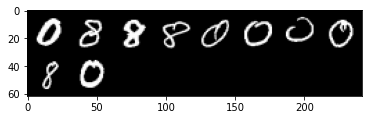

Labels: tensor([0, 2, 2, 2, 0, 0, 0, 0, 2, 0])


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms #TORCHVISION IS A SUBPACKAGE THAT CONTAINS MANY INTERESTING UTILITIES FOR HANDLING IMAGES
from torchvision.utils import make_grid

# USE TRANSFORMS TO RE-SCALE, NORMALIZE... TRANSFORM! HERE WE JUST GO FROM NUMPY ARRAY TO PYTORCH TENSOR
transform = transforms.Compose([transforms.ToTensor()])

mnist_trainingset = datasets.ImageFolder(root='./MNIST-Dataset/Training', transform=transform)

# NOTICE BATCH_SIZE AND NUM_WORKERS PARAMETERS - LOAD SMALL A AMOUNT AT A TIME, IN PARALLEL!
trainingset_loader = torch.utils.data.DataLoader(mnist_trainingset, batch_size=10,shuffle=True, num_workers=2)

# LET'S LOAD A SINGLE BATCH AND DISPLAY IT
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainingset_loader)

images, labels = dataiter.next()

imshow(make_grid(images))

print("Labels:",labels)

In [12]:
# LET'S NOT FORGET TO LOAD THE TEST SET

mnist_testset = datasets.ImageFolder(root='./MNIST-Dataset/Test', transform=transform)
testset_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=10,shuffle=True, num_workers=2)

In [13]:
#WHAT SIZE SHOULD OUR NETWORK BE?
images[0].shape

torch.Size([3, 28, 28])

In [14]:
# NOW LET'S TRAIN A MODEL

class ImageLogisticRegression(torch.nn.Module):

    def __init__(self):
        super(ImageLogisticRegression, self).__init__()
        self.fc1 = torch.nn.Linear(3*28*28, 3)
    def forward(self, X):
        #FLATTEN THE TENSOR INTO A (3*28*28,1) VECTOR
        X = X.reshape(-1,3*28*28)
        X = self.fc1(X)

        return X  

model = ImageLogisticRegression()

#model.to(device) # LOAD MODEL ON GPU

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
loss_function = torch.nn.CrossEntropyLoss()  

print(model)

ImageLogisticRegression(
  (fc1): Linear(in_features=2352, out_features=3, bias=True)
)


In [15]:
for epoch in range(2): 

    for i, data in enumerate(trainingset_loader, 0):
        X_batch, Y_batch = data
        
        X_batch.to(device) # LOAD DATA ON GPU ONE BATCH AT A TIME
        Y_batch.to(device)
    
        optimizer.zero_grad()

        Y_hat = model(X_batch)
        loss = loss_function(Y_hat, Y_batch)
        loss.backward()
        optimizer.step()
        
print("Final Loss:",loss.data.item())
print('Finished Training!')

Final Loss: 0.011232801713049412
Finished Training!


Here we used built-in utilities and trained a model on image files. But what if you need to load a massive csv or other types of data for which there is no built-in option available? In those cases you can build your own Custom Datasets and Loaders.

### Example - Loading the Iris Dataset CSV file using Custom Dataset and Loader

In [16]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader


# CUSTOM DATASETS INHERIT FROM PYTORCH CLASS 'Dataset'

class CSVDataset(Dataset):
    
    def __init__(self, path):
        
        self.iris_dataset = pd.read_csv(path, iterator=True, names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species'])    

    # THIS METHOD DRIVES WHAT HAPPENS WHEN A LOADER IS USED TO LOAD A BATCH
    def __getitem__(self, index):
        
        row = self.iris_dataset.get_chunk(1)
        
        row.loc[row.species=='Iris-setosa', 'species'] = 0
        row.loc[row.species=='Iris-versicolor', 'species'] = 1
        row.loc[row.species=='Iris-virginica', 'species'] = 2
        
        X = row.values[:,0:4].astype('float32')
        Y = row.values[:,4].astype('int32')
       
        X = Variable(torch.Tensor(X).float())
        Y = Variable(torch.Tensor(Y).long())
    
        return X,Y

    def __len__(self):
        return 150 
    
iris_dataset = CSVDataset('./data/iris.csv')
iris_loader = torch.utils.data.DataLoader(iris_dataset, batch_size=10,shuffle=False, num_workers=2)

In [17]:
model = LogisticRegression()

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
loss_function = torch.nn.CrossEntropyLoss()  

for epoch in range(3): 
    for i, data in enumerate(iris_loader, 0):
        X_batch, Y_batch = data
        
        X_batch = X_batch.reshape(-1,4) #CHOPPING ONE DIMENSION OFF OF LOADER OUTPUT
        Y_batch = Y_batch.reshape(-1)
        
        optimizer.zero_grad()

        Y_hat = model(X_batch)
        loss = loss_function(Y_hat, Y_batch)
        loss.backward()
        optimizer.step()
        
print("Final Loss:",loss.data.item())        
print('Finished Training!')

Final Loss: 0.1801925152540207
Finished Training!


## Exercise 4 - Datasets, Loaders, Mini-Batching and GPU

Now you try. Load either the Fruit Images dataset or the Wine csv and train a model using mini-batching and GPU. If you're looking for a challenging, try implementing a Custom Dataset for the Fruit Images dataset instead of using the built-in utility from torchvision.

In [ ]:
### Your code here.

## Training on Multiple GPUs

The last advantage of **PyTorch** over **sckit-learn** on our list of performance enhancements was user-friendly parallel/distributed training. You have seen how to enable training a entire model on a single GPU so far, but what if you have multiple GPUs at your disposal as it is the case on **Compute Canada**'s clusters? Can this accelerate training even more? 

You bet.

As you will see in the next example, doing this in PyTorch is as simple as adding a couple extra lines of code to the single GPU case. Concretely, what this will do is what we call "Data Parallelism". Very literally, PyTorch will split your inputs into a number of parts equal to however many GPUs are available and run your training loop on them in parallel. This works very well in simple cases like the kinds of neural networks we've been training so far, but extra care need to be taken if your models are more complex than just a series of torch.nn modules.

There is another type of Parallelism that is possible on PyTorch, but that we will not cover in this introductory workshop: multi-node distributed training. In this type of parallelism, you may have not only multiple GPUs, but multiple computers, each maybe with its own set of multiple GPUs.

## Example - Training on Multiple GPUs

In this example, we'll revisit the MNIST handwritten digit dataset and train a model using multiple GPUs.

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#LOAD THE SAME MODEL ARCHITECTURE FROM THE SINGLE GPU EXAMPLE
model = ImageLogisticRegression()

# USE nn.DataParallel TO WRAP THE MODEL
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")

  model = nn.DataParallel(model)

# THIS TIME SEND MODEL TO MULTIPLE GPUs    
model.to(device)

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
loss_function = torch.nn.CrossEntropyLoss()  

print(model)

ImageLogisticRegression(
  (fc1): Linear(in_features=2352, out_features=3, bias=True)
)


In [19]:
for epoch in range(2): 

    for i, data in enumerate(trainingset_loader, 0):
        X_batch, Y_batch = data
        
        X_batch.to(device) # LOAD DATA ON GPU ONE BATCH AT A TIME
        Y_batch.to(device)
    
        optimizer.zero_grad()

        Y_hat = model(X_batch)
        loss = loss_function(Y_hat, Y_batch)
        loss.backward()
        optimizer.step()
        
print("Final Loss:",loss.data.item())
print('Finished Training!')

Final Loss: 0.08903196454048157
Finished Training!
